metadata https://rdrr.io/cran/AER/man/CASchools.html

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.graphics.api as smg
from statsmodels.compat.python import lzip

from scipy import stats

In [2]:
df = pd.read_csv("caschool.csv", engine='python')
print ("Row and columns = ", df.shape)
df.head()

Row and columns =  (420, 18)


,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [3]:
df.columns

Index(['Observation Number', 'dist_cod', 'county', 'district', 'gr_span',
       'enrl_tot', 'teachers', 'calw_pct', 'meal_pct', 'computer', 'testscr',
       'comp_stu', 'expn_stu', 'str', 'avginc', 'el_pct', 'read_scr',
       'math_scr'],
      dtype='object')

### Pearson correlation

In [4]:
pearsonc = stats.pearsonr(df['testscr'], df['avginc'])
name =  ["Coefficient", "p value"]
lzip(name, pearsonc)

[('Coefficient', 0.7124308316760396), ('p value', 2.751833507384696e-66)]

### Spearman correlation

In [5]:
spearmanc = stats.spearmanr(df['testscr'], df['avginc'])
name =  ["Coefficient", "p value"]
lzip(name, spearmanc)

[('Coefficient', 0.6897405358562295), ('p value', 1.3683335426820145e-60)]

### Creating first model

In [6]:
model = smf.ols('testscr ~avginc ', data=df)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     430.8
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           2.75e-66
Time:                        23:41:09   Log-Likelihood:                -1684.5
No. Observations:                 420   AIC:                             3373.
Df Residuals:                     418   BIC:                             3381.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    625.3836      1.532    408.106      0.0

## Diagnostics for the first model

https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html

### Linearlity

In [7]:
name = ["t value", "p value"]
test = sms.linear_harvey_collier(model_fit)
lzip(name, test)

[('t value', 15.23403254594446), ('p value', 5.841712400688892e-42)]

C:\Users\tom\.virtualenvs\fish\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

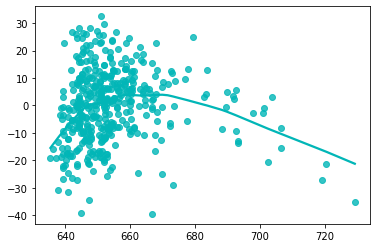

In [8]:
sns.regplot(model_fit.fittedvalues, model_fit.resid, 
                  data=df, lowess=True,  color='#01B6B7')

### Independence

https://www.statsmodels.org/stable/generated/statsmodels.stats.stattools.durbin_watson.html

Durbin-Watson:  0.650

C:\Users\tom\.virtualenvs\fish\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avginc'>

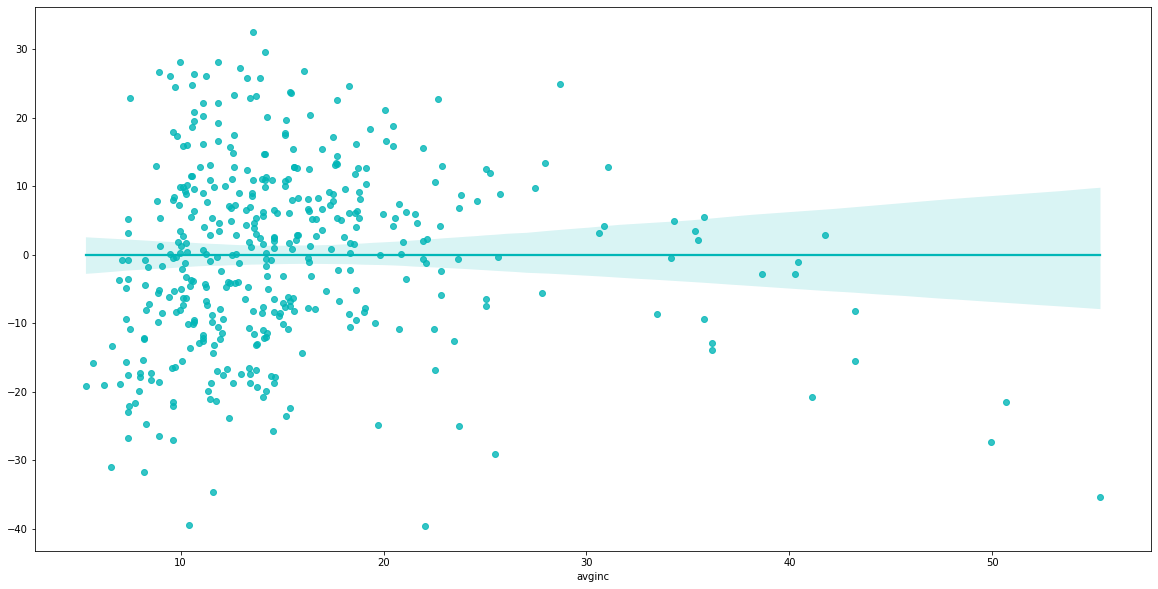

In [9]:
plt.rc('figure', figsize=(20,10))

sns.regplot(df['avginc'], model_fit.resid , 
                  data=df,  color='#01B6B7')

### Normality

C:\Users\tom\.virtualenvs\fish\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


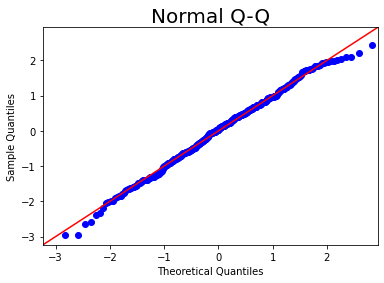

In [10]:
plt.rc('figure', figsize=(6,4))
probplot  = smg.qqplot(model_fit.resid, fit=True, line="45")
plt.title('Normal Q-Q', fontsize=20)
plt.show()

### Heteroskedascity

In [11]:
from statsmodels.stats.api import het_white
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = het_white(model_fit.resid, model_fit.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 25.028604056048042),
 ('p-value', 3.6737338031672627e-06),
 ('f-value', 13.212257898358128),
 ('f p-value', 2.731869286253876e-06)]

In [12]:
print("Breush-Pagan test:")
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(model_fit.resid, model_fit.model.exog)
lzip(name, test)

Breush-Pagan test:


[('Lagrange multiplier statistic', 0.07868804387868966),
 ('p-value', 0.7790832684860904),
 ('f-value', 0.07832801385592844),
 ('f p-value', 0.7797145934512189)]

In [13]:
print("Goldfeld-Quandt test:")
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(model_fit.resid, model_fit.model.exog)
lzip(name, test)

Goldfeld-Quandt test:


[('F statistic', 0.6354101327810726), ('p-value', 0.9994277828994063)]

### Creating alternative model

### 1. log regression model

In [14]:
df['log_testscr'] = np.log(df['testscr'])

In [15]:
model2 = smf.ols('log_testscr ~avginc ', data=df)
model2_fit = model2.fit()
print(model2_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            log_testscr   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     415.0
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.41e-64
Time:                        23:41:10   Log-Likelihood:                 1034.7
No. Observations:                 420   AIC:                            -2065.
Df Residuals:                     418   BIC:                            -2057.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4394      0.002   2724.161      0.0

### 2. log-log regression model

In [16]:
df['log_avginc'] = np.log(df['avginc'])

In [17]:
model3 = smf.ols('log_testscr ~log_avginc ', data=df)
model3_fit = model3.fit()
print(model3_fit.summary())

                            OLS Regression Results                            
Dep. Variable:            log_testscr   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     527.2
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           4.52e-76
Time:                        23:41:10   Log-Likelihood:                 1061.2
No. Observations:                 420   AIC:                            -2118.
Df Residuals:                     418   BIC:                            -2110.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3363      0.006    981.902      0.0